In [1]:
import os
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline 


C:\Users\Leandro-Brito\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Leandro-Brito\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [4]:
# Gerar o data frame
df = pd.read_csv('M5A11/dados/diamonds.csv')

In [6]:
#Informações dos campos 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [7]:
# Vê as primeira linhas do data SET 
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [9]:
# Analise estatisticas 
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [10]:
# Checar valores missing 
df.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [11]:
# Checar valores duplicados
df.duplicated().sum()

0

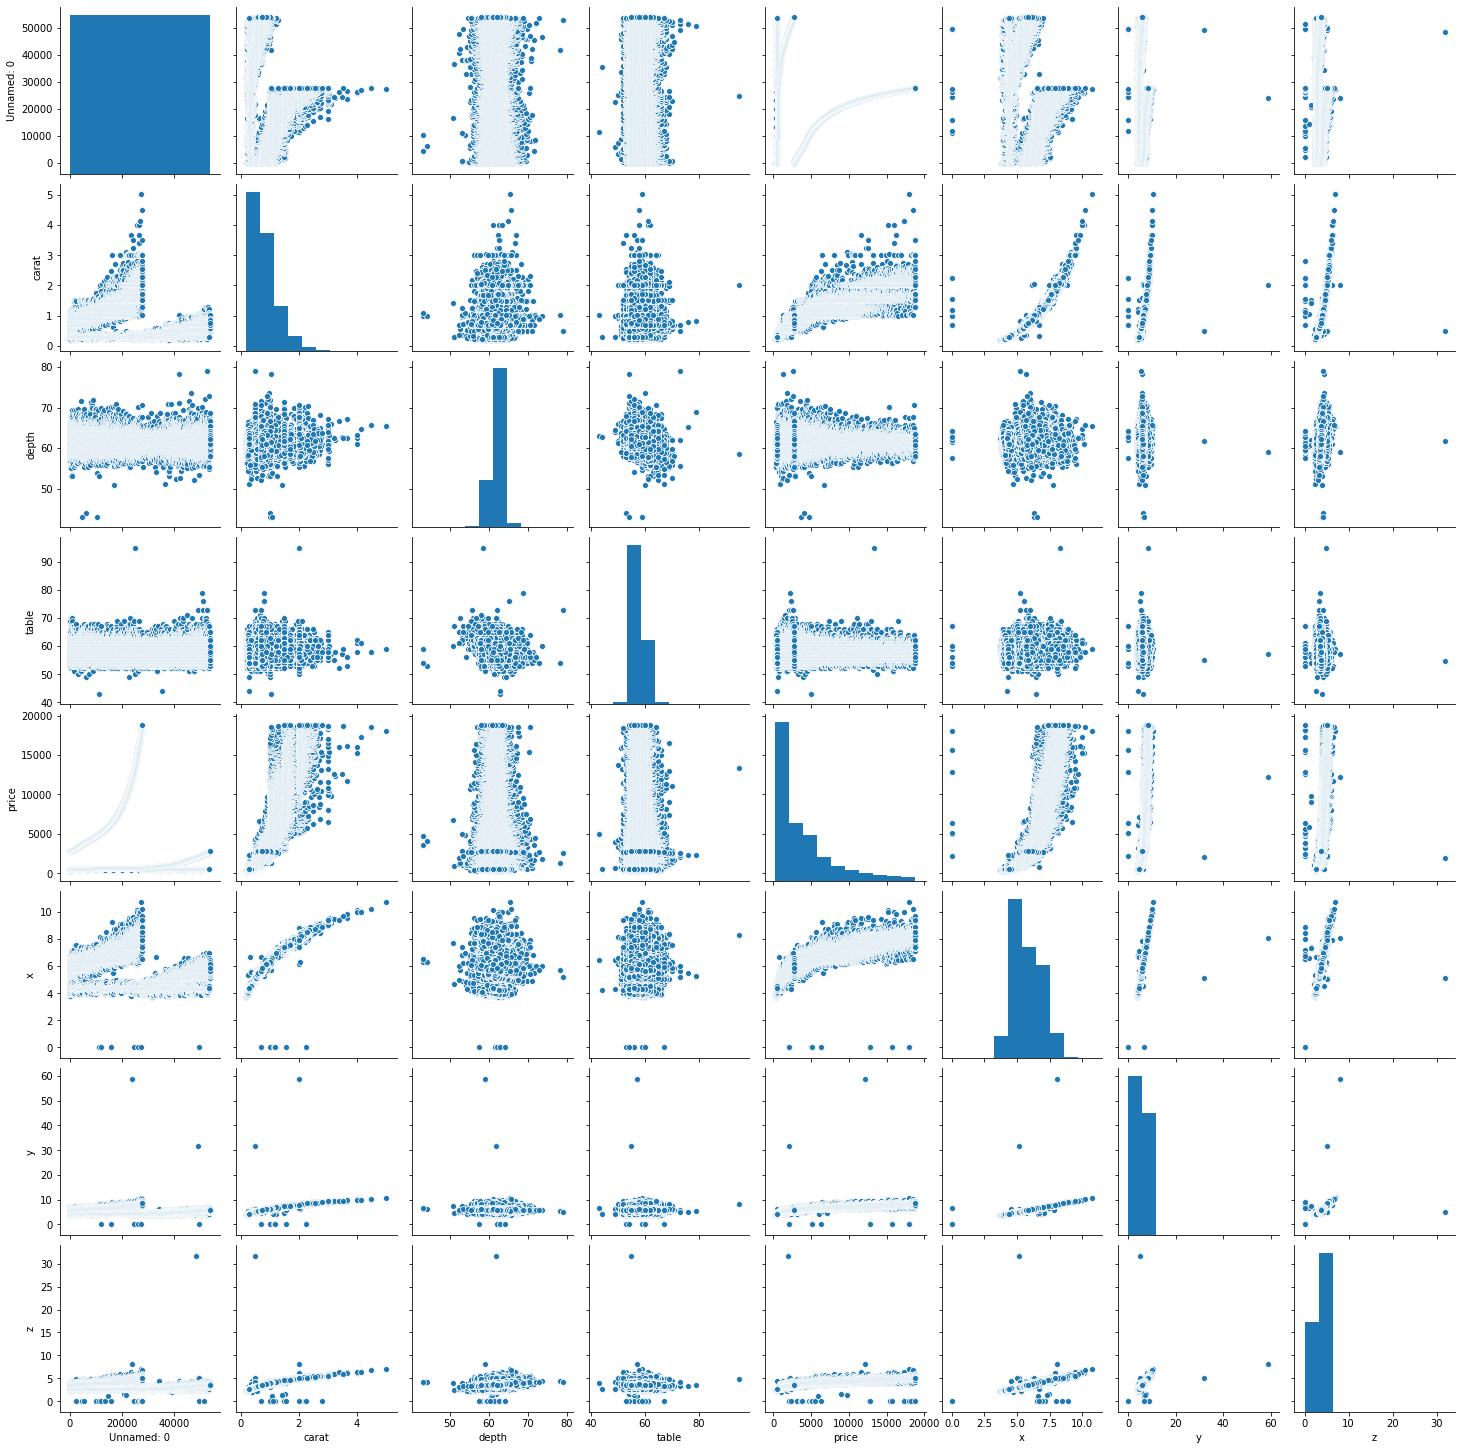

In [12]:
# Explorar  a visualização dos dados 
sns.pairplot(df)

In [17]:
# Separar os dados de treinamento 
x = df['carat'].values.reshape(-1,1) 
y = df['price'].values.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [18]:
# Submeter o modelo 
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
#Applicar  o modelo 
y_predicti = model.predict(x_test)

In [22]:
# Comparar o valor real 
real_vs_predito = pd.DataFrame({'Real': y_test.flatten(), 'Predito':y_predicti.flatten()})
real_vs_predito.sample(3)

,Real,Predito
5094,12401,9679.235079
2281,987,152.569483
2370,9471,9446.877382


In [23]:
# Avaliação da acuracia do modelo 
print('Acuracia: %2f'%(model.score(x_test, y_test)*100), '%')

Acuracia: 85.157581 %


In [29]:
!pip install statsmodels

In [31]:
df = pd.read_csv('M5A11/dados/pesos.csv')
import statsmodels.formula.api as smf

In [32]:
# Criar o modelo de regração 
estimativa = smf.ols(formula = 'Peso ~ Idade', data = df)

# Treinando o modelo  
modelo = estimativa.fit()

# Apresentare o resultado 
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                   Peso   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     774.9
Date:                Thu, 31 Dec 2020   Prob (F-statistic):           1.50e-11
Time:                        12:35:04   Log-Likelihood:                 1.3432
No. Observations:                  13   AIC:                             1.314
Df Residuals:                      11   BIC:                             2.444
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.4737      0.124     27.937      0.0

C:\Users\Leandro-Brito\Anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))
